In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('tweet_emotions.csv')


In [ ]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
data.shape

(40000, 3)

In [ ]:
data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [ ]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
data.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(40000, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

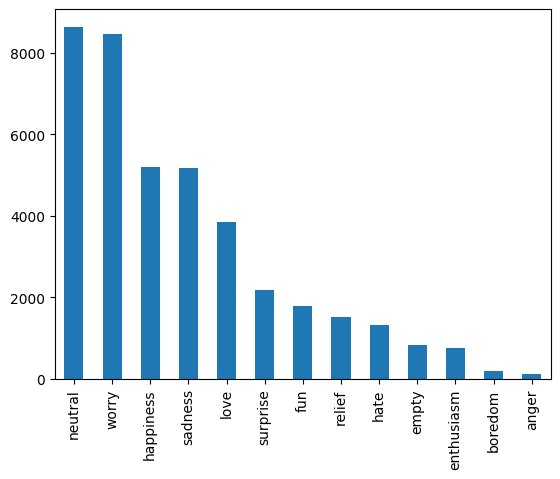

In [ ]:
data['sentiment'].value_counts().plot(kind = 'bar')
plt.show

Data Preprocessing

In [ ]:
# Here we will define the functions for each preprocessing techniques first and then will apply into our dataset

# 1. Punctuation_removal

import string
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, ' ')
  return text

In [ ]:
#2. tokenization
import nltk
nltk.download('punkt')
def tokenize(text):
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# 3. stopwords removal
nltk.download('stopwords')

def remove_stopwords(text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  output = [i for i in text if i not in stop_words]
  return output


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 4. Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
  lemmatizer = nltk.stem.WordNetLemmatizer()
  output = [lemmatizer.lemmatize(i) for i in text]
  return output

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess(df_col):
  corpus = []
  for item in df_col:
    new_item = remove_punctuation(item)
    new_item = new_item.lower()
    new_item = tokenize(new_item)
    new_item = remove_stopwords(new_item)
    new_item = lemmatize(new_item)
    corpus.append(''.join(str(x) for x in new_item))
  return corpus


In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,1,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,1956967696,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,3,"[want, hang, friend, soon]"
4,1956968416,4,"[dannycastillo, want, trade, someone, houston,..."
5,1956968477,1,"[pinging, ghostridah14, go, prom, bc, bf, like..."


In [ ]:
data['content'] = data['content'].apply(preprocess)

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,1,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,1956967696,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,3,"[want, hang, friend, soon]"
4,1956968416,4,"[dannycastillo, want, trade, someone, houston,..."
5,1956968477,1,"[pinging, ghostridah14, go, prom, bc, bf, like..."


In [ ]:
data['sentiment'].value_counts()

1    13803
0    12353
4     8638
3     2946
2     1433
Name: sentiment, dtype: int64

In [ ]:
data.shape

(39173, 3)

In [ ]:
# Here there are 827 empty sentiments in our dataset. So drop rows having empty sentiments

In [ ]:
data = data[data['sentiment'] != 'empty']

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,1,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,1956967696,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,3,"[want, hang, friend, soon]"
4,1956968416,4,"[dannycastillo, want, trade, someone, houston,..."
5,1956968477,1,"[pinging, ghostridah14, go, prom, bc, bf, like..."


In [ ]:
data.tail()

,tweet_id,sentiment,content
39995,1753918954,4,[johnlloydtaylor]
39996,1753919001,0,"[happy, mother, day, love]"
39997,1753919005,0,"[happy, mother, day, mommy, woman, man, long, ..."
39998,1753919043,0,"[niariley, wassup, beautiful, follow, peep, ne..."
39999,1753919049,0,"[mopedronin, bullet, train, tokyo, gf, visitin..."


In [ ]:
data.shape

(39173, 3)

In [ ]:
data['sentiment'].value_counts()

1    13803
0    12353
4     8638
3     2946
2     1433
Name: sentiment, dtype: int64

In [ ]:
data['sentiment'] = data['sentiment'].replace(['happiness','love','fun','relief'], 0)

<ipython-input-27-7a8dd637c84c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(['happiness','love','fun','relief'], 0)


In [ ]:
data['sentiment'] = data['sentiment'].replace(['worry','sadness','boredom'], 1)

In [ ]:
data['sentiment'] = data['sentiment'].replace(['hate','anger'],2)

In [ ]:
data['sentiment'] = data['sentiment'].replace(['enthusiasm','surprise'],3)

In [ ]:
data['sentiment'] = data['sentiment'].replace(['neutral'],4)

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,1,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,1956967696,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,3,"[want, hang, friend, soon]"
4,1956968416,4,"[dannycastillo, want, trade, someone, houston,..."
5,1956968477,1,"[pinging, ghostridah14, go, prom, bc, bf, like..."


FEATURE EXTRACTION


In [61]:
def vec_text(corpus):
  bow_model = CountVectorizer()
  vec = bow_model.fit_transform(corpus).todense()
  # todense() for vector
  vec_df = pd.DataFrame(vec)
  vec_df.columns = sorted(bow_model.vocabulary_)
  return vec_df

In [62]:
# here to extract the features lets use CountVectorizer and tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
corpus = preprocess(data['content'])

AttributeError: 'list' object has no attribute 'replace'

Model Building


In [ ]:
x = data['content']
y = data['sentiment']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [57]:
corpus = data['content'].tolist()

In [58]:
def vec_text(corpus):
  bow_model = CountVectorizer()
  vec = bow_model.fit_transform(corpus).todense()
  # todense() for vector
  vec_df = pd.DataFrame(vec)
  vec_df.columns = sorted(bow_model.vocabulary_)
  return vec_df

In [60]:
corpus = [string.lower() for string in data['content'].tolist()]

AttributeError: 'list' object has no attribute 'lower'

Model Building

In [59]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
x = traindata
y = data['sentiment']